<a href="https://colab.research.google.com/github/minhhung250302/TrinhMinhHungUTE/blob/main/nh%E1%BA%A1c_c%E1%BB%A5_x%E1%BB%AD_l%C3%AD_%E1%BA%A3nh_%C4%91%C6%B0a_v%C3%A0o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/finish/nhandiennhaccu

/content/drive/MyDrive/Colab Notebooks/finish/nhandiennhaccu


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/finish/nhandiennhaccu/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 588 images belonging to 8 classes.


In [5]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/finish/nhandiennhaccu/Val',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 103 images belonging to 8 classes.


In [6]:
training_set.class_indices

{'Congchieng': 0,
 'Dandoan': 1,
 'Dannhi_danco': 2,
 'Dantiba': 3,
 'Dantranhvietnam': 4,
 'Khen': 5,
 'Saotruc': 6,
 'danda': 7}

In [7]:
validation.class_indices

{'Congchieng': 0,
 'Dandoan': 1,
 'Dannhi_danco': 2,
 'Dantiba': 3,
 'Dantranhvietnam': 4,
 'Khen': 5,
 'Saotruc': 6,
 'danda': 7}

In [8]:
# Tạo ra mạng CNN để train mô hình
model= Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 8 tín hiệu ra
model.add(Dense(8,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 200 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 30 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=200 ,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/200
19/19 [==============================] - 16s 793ms/step - loss: 0.3719 - accuracy: 0.8861 - val_loss: 0.1281 - val_accuracy: 0.9612
Epoch 2/200
19/19 [==============================] - 13s 697ms/step - loss: 0.1940 - accuracy: 0.9269 - val_loss: 0.0670 - val_accuracy: 0.9709
Epoch 3/200
19/19 [==============================] - 13s 687ms/step - loss: 0.2775 - accuracy: 0.9048 - val_loss: 0.0881 - val_accuracy: 0.9709
Epoch 4/200
19/19 [==============================] - 13s 687ms/step - loss: 0.2331 - accuracy: 0.9371 - val_loss: 0.2786 - val_accuracy: 0.9320
Epoch 5/200
19/19 [==============================] - 13s 676ms/step - loss: 0.2575 - accuracy: 0.9252 - val_loss: 0.1196 - val_accuracy: 0.9709
Epoch 6/200
19/19 [==============================] - 13s 690ms/step - loss: 0.2138 - accuracy: 0.9235 - val_loss: 0.0329 - val_accuracy: 1.0000
Epoch 7/200
19/19 [==============================] - 13s 692ms/step - loss: 0.2226 - accuracy: 0.9371 - val_loss: 0.2237 - val_accuracy:

In [14]:
Score=model.evaluate(training_set,verbose=0)
print('Kiểm tra sai  ', Score[0])
print('Kiểm tra chính xác  ', Score[1])

Kiểm tra sai   0.008221159689128399
Kiểm tra chính xác   0.9982993006706238


In [15]:
model.save("nhaccuxulianhduavao.h5")

In [16]:
model_ANN=load_model('nhaccuxulianhduavao.h5') #ANN với xử lí ảnh đưa vào 

1/1 [==============================] - 1s 584ms/step
Đàn Tranh Việt Nam


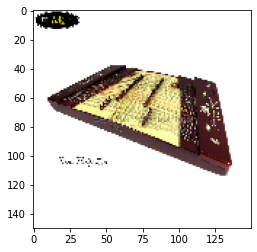

In [17]:
img=load_img('/content/111.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Cồng Chiêng'
if round(result[0][1])==1:
  prediction='Đàn Đoản '
if round(result[0][2])==1:
  prediction='Đàn Nhị (Đàn cò) '
if round(result[0][3])==1:
  prediction='Đàn tì bà '
if round(result[0][4])==1:
  prediction='Đàn Tranh Việt Nam'
if round(result[0][5])==1:
  prediction='Khèn '
if round(result[0][6])==1:
  prediction='Sáo '
if round(result[0][7])==1:
  prediction='Đàn Đá'
print(prediction)

1/1 [==============================] - 0s 17ms/step
Khèn 


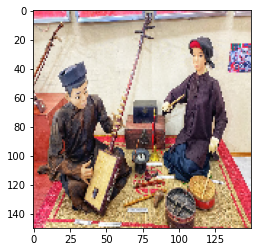

In [18]:
img=load_img('/content/Z3323218443249_Dbe23.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Cồng Chiêng'
if round(result[0][1])==1:
  prediction='Đàn Đoản '
if round(result[0][2])==1:
  prediction='Đàn Nhị (Đàn cò) '
if round(result[0][3])==1:
  prediction='Đàn tì bà '
if round(result[0][4])==1:
  prediction='Đàn Tranh Việt Nam'
if round(result[0][5])==1:
  prediction='Khèn '
if round(result[0][6])==1:
  prediction='Sáo '
if round(result[0][7])==1:
  prediction='Đàn Đá'
print(prediction)

1/1 [==============================] - 0s 17ms/step
Khèn 


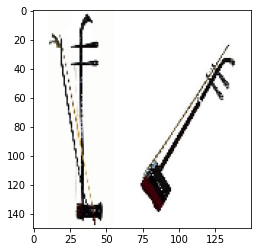

In [20]:
img=load_img('/content/dan-nhi.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Cồng Chiêng'
if round(result[0][1])==1:
  prediction='Đàn Đoản '
if round(result[0][2])==1:
  prediction='Đàn Nhị (Đàn cò) '
if round(result[0][3])==1:
  prediction='Đàn tì bà '
if round(result[0][4])==1:
  prediction='Đàn Tranh Việt Nam'
if round(result[0][5])==1:
  prediction='Khèn '
if round(result[0][6])==1:
  prediction='Sáo '
if round(result[0][7])==1:
  prediction='Đàn Đá'
print(prediction)

1/1 [==============================] - 0s 20ms/step
Đàn tì bà 


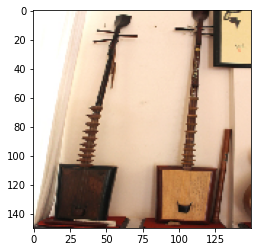

In [ ]:
img=load_img('/content/dan-day-vo-de-cam.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Cồng Chiêng'
if round(result[0][1])==1:
  prediction='Đàn Đoản '
if round(result[0][2])==1:
  prediction='Đàn Nhị (Đàn cò) '
if round(result[0][3])==1:
  prediction='Đàn tì bà '
if round(result[0][4])==1:
  prediction='Đàn Tranh Việt Nam'
if round(result[0][5])==1:
  prediction='Khèn '
if round(result[0][6])==1:
  prediction='Sáo '
if round(result[0][7])==1:
  prediction='Đàn Đá'
print(prediction)

1/1 [==============================] - 0s 17ms/step
Cồng Chiêng


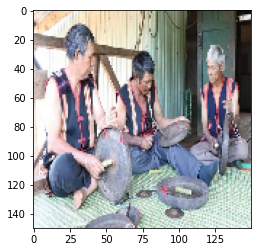

In [21]:
img=load_img('/content/vna_potal_gia_lai_luu_giu_am_thanh_cong_chieng_tay_nguyen_5848011.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Cồng Chiêng'
if round(result[0][1])==1:
  prediction='Đàn Đoản '
if round(result[0][2])==1:
  prediction='Đàn Nhị (Đàn cò) '
if round(result[0][3])==1:
  prediction='Đàn tì bà '
if round(result[0][4])==1:
  prediction='Đàn Tranh Việt Nam'
if round(result[0][5])==1:
  prediction='Khèn '
if round(result[0][6])==1:
  prediction='Sáo '
if round(result[0][7])==1:
  prediction='Đàn Đá'
print(prediction)